In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def plot3D(x_, y_, Z_, V=0):
    fig = plt.figure(figsize=(10, 10))
    ax = plt.axes(projection="3d")
    
    ax.plot_surface(y_, x_, Z_, color='red', alpha=1)
    
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')

    ax.view_init(elev=30, azim=(V-60))
    
    # Invert the x-axis
    ax.set_xlim(ax.get_xlim()[::-1])  

    plt.show()

In [10]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [32]:
a = 0.005
N = 25
g = 9.82
K_tot = 1
K = K_tot * (N-1)
m_tot = 1
m = m_tot/(N**2)
L_0tot = 1
L_0 = L_0tot / (1-N)
maxiter = 1000

In [34]:
x = np.linspace(0,1,N)
y = np.linspace(0,1,N)
x[find_nearest(x,1/3)] = 1/3
y[find_nearest(y,1/3)] = 1/3
x[find_nearest(x,2/3)] = 2/3
y[find_nearest(y,2/3)] = 2/3
x[find_nearest(x,1/2)] = 1/2
y[find_nearest(y,1/2)] = 1/2

X, Y = np.meshgrid(x, y)

hx = find_nearest(x,1/2)
hy = find_nearest(y,1/2)

f1 = find_nearest(x,1/3)
f2 = find_nearest(x,2/3)
fixedindex = [[0,0], [len(x) - 1, len(y) - 1], [0, len(y) - 1], [len(x) - 1, 0], [f1,f1], [f2,f2], [0,hy], [hx,0], [len(x) - 1, hy], [hx, len(y)-1]]

X

array([[0.        , 0.04166667, 0.08333333, 0.125     , 0.16666667,
        0.20833333, 0.25      , 0.29166667, 0.33333333, 0.375     ,
        0.41666667, 0.45833333, 0.5       , 0.54166667, 0.58333333,
        0.625     , 0.66666667, 0.70833333, 0.75      , 0.79166667,
        0.83333333, 0.875     , 0.91666667, 0.95833333, 1.        ],
       [0.        , 0.04166667, 0.08333333, 0.125     , 0.16666667,
        0.20833333, 0.25      , 0.29166667, 0.33333333, 0.375     ,
        0.41666667, 0.45833333, 0.5       , 0.54166667, 0.58333333,
        0.625     , 0.66666667, 0.70833333, 0.75      , 0.79166667,
        0.83333333, 0.875     , 0.91666667, 0.95833333, 1.        ],
       [0.        , 0.04166667, 0.08333333, 0.125     , 0.16666667,
        0.20833333, 0.25      , 0.29166667, 0.33333333, 0.375     ,
        0.41666667, 0.45833333, 0.5       , 0.54166667, 0.58333333,
        0.625     , 0.66666667, 0.70833333, 0.75      , 0.79166667,
        0.83333333, 0.875     , 0.91666667, 0.

In [36]:
Z = np.full_like(X, 0)
Z[0, 0] = 0       
Z[0, -1] = 0         
Z[-1, 0] = 0         
Z[-1, -1] = 0     
Z[f1, f1] = 1
Z[f2, f2] = 1
Z[0, hy] = 0
Z[hx,0] = 0
Z[-1, hy] = 0
Z[hx,-1] = 0

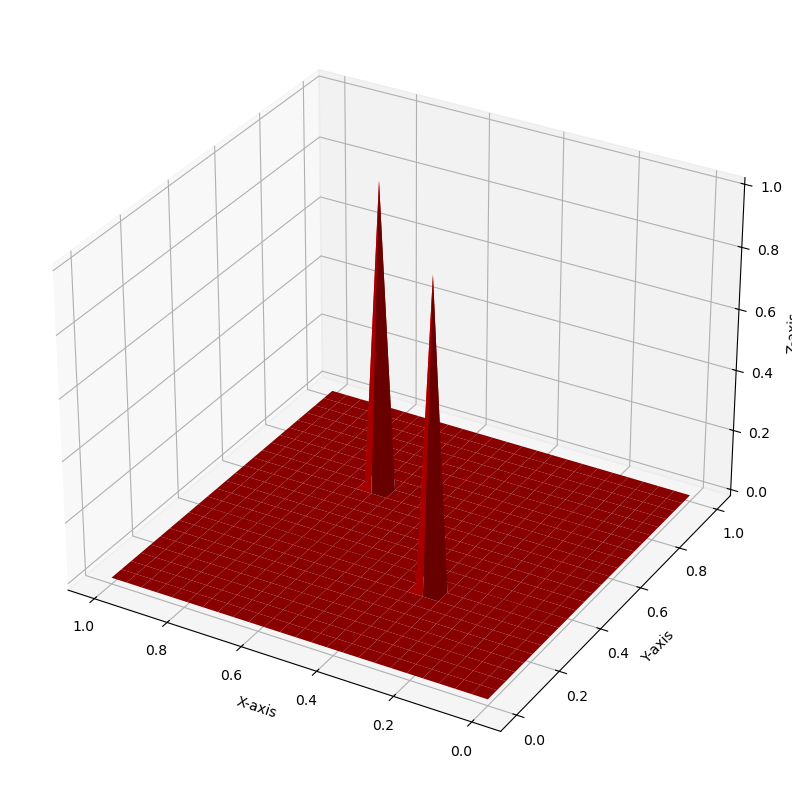

In [38]:
plot3D(X,Y,Z)

In [40]:
def calcForces(cord1, cord2, K_, L0, M, G):
    x1,y1,z1 = cord1
    x2,y2,z2 = cord2
    
    dx = x2 - x1
    dy = y2 - y1
    dz = z2 - z1
    
    # Calculate the current distance between the two points
    L = np.sqrt(dx**2 + dy**2 + dz**2)
    
    #Calculating spring forces
    Fx_spring = K_ * (L - L0) * (dx / L)
    Fy_spring = K_ * (L - L0) * (dy / L)
    Fz_spring = K_ * (L - L0) * (dz / L)
    
    # Total forces on point 1
    Fx_total = Fx_spring
    Fy_total = Fy_spring 
    Fz_total = Fz_spring
    
    return Fx_total, Fy_total, Fz_total

In [46]:
for iter in range(maxiter):
    for i in range(len(X)):
        for j in range(len(Y)):
            x = X[i, j]
            y = Y[i, j]
            z = Z[i, j]
            coordinates = [x, y, z]

            Fx = 0
            Fy = 0
            Fz = -m * g

            if([i,j] not in fixedindex):
                neighbors = [
                    [i + 1, j, z] if i + 1 < len(X) else None,
                    [i - 1, j, z] if i - 1 >= 0 else None,
                    [i, j + 1, z] if j + 1 < len(Y) else None,
                    [i, j - 1, z] if j - 1 >= 0 else None
                ]

                for neighbor in neighbors:
                    if neighbor is not None:
                        x2, y2, z2 = X[neighbor[0], neighbor[1]], Y[neighbor[0], neighbor[1]], Z[neighbor[0], neighbor[1]]
                        Fx_temp, Fy_temp, Fz_temp = calcForces(coordinates, [x2, y2, z2], K, L_0, m, g)
                        Fx += Fx_temp
                        Fy += Fy_temp
                        Fz += Fz_temp

                X[i, j] += a * Fx
                Y[i, j] += a * Fy
                Z[i, j] += a * Fz

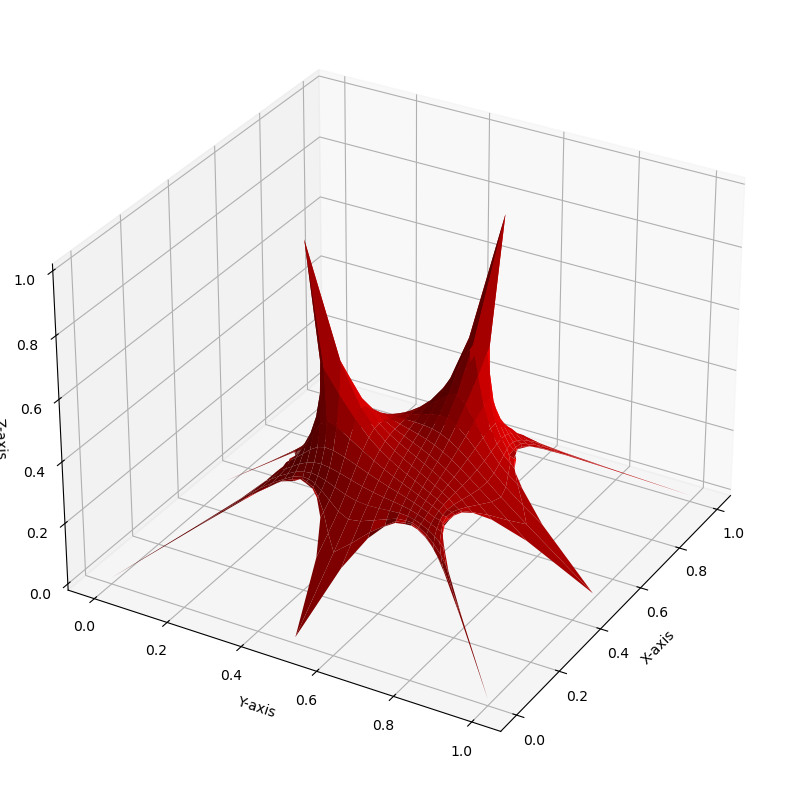

In [52]:
plot3D(X,Y,Z,90)